In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as sm1
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
df = pd.read_excel('../data/df.xlsx') 

#### 1. The dataset contains data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), AmbientPressure (AP),Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electricalenergy output (EP) of the plant.
#### 1. (b) 
#### i. How many rows are in this data set? How many columns? What do the rowsand columns represent.
- There are  9568 rows and 5 columns, the rows represents each hour when power plant was set to work with full load, what features record were over 6 years period. Features or columns consist of hourly average ambient variables Temperature (T), AmbientPressure (AP),Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electricalenergy output (EP) of the plant.
#### ii Make pairwise scatterplots of all the varianbles in the data set including thepredictors (independent variables) with the dependent variable. Describe yourfindings
- Based on the pairplot that was generated, AT and V have negative relationship with EP/PE. These relationships seem to be linear and other two features's relationship with dependent variable aren't as linear as these two. While AP and RH show slight positive relationship with PE, their positive relationships aren't as strong as two other features.  

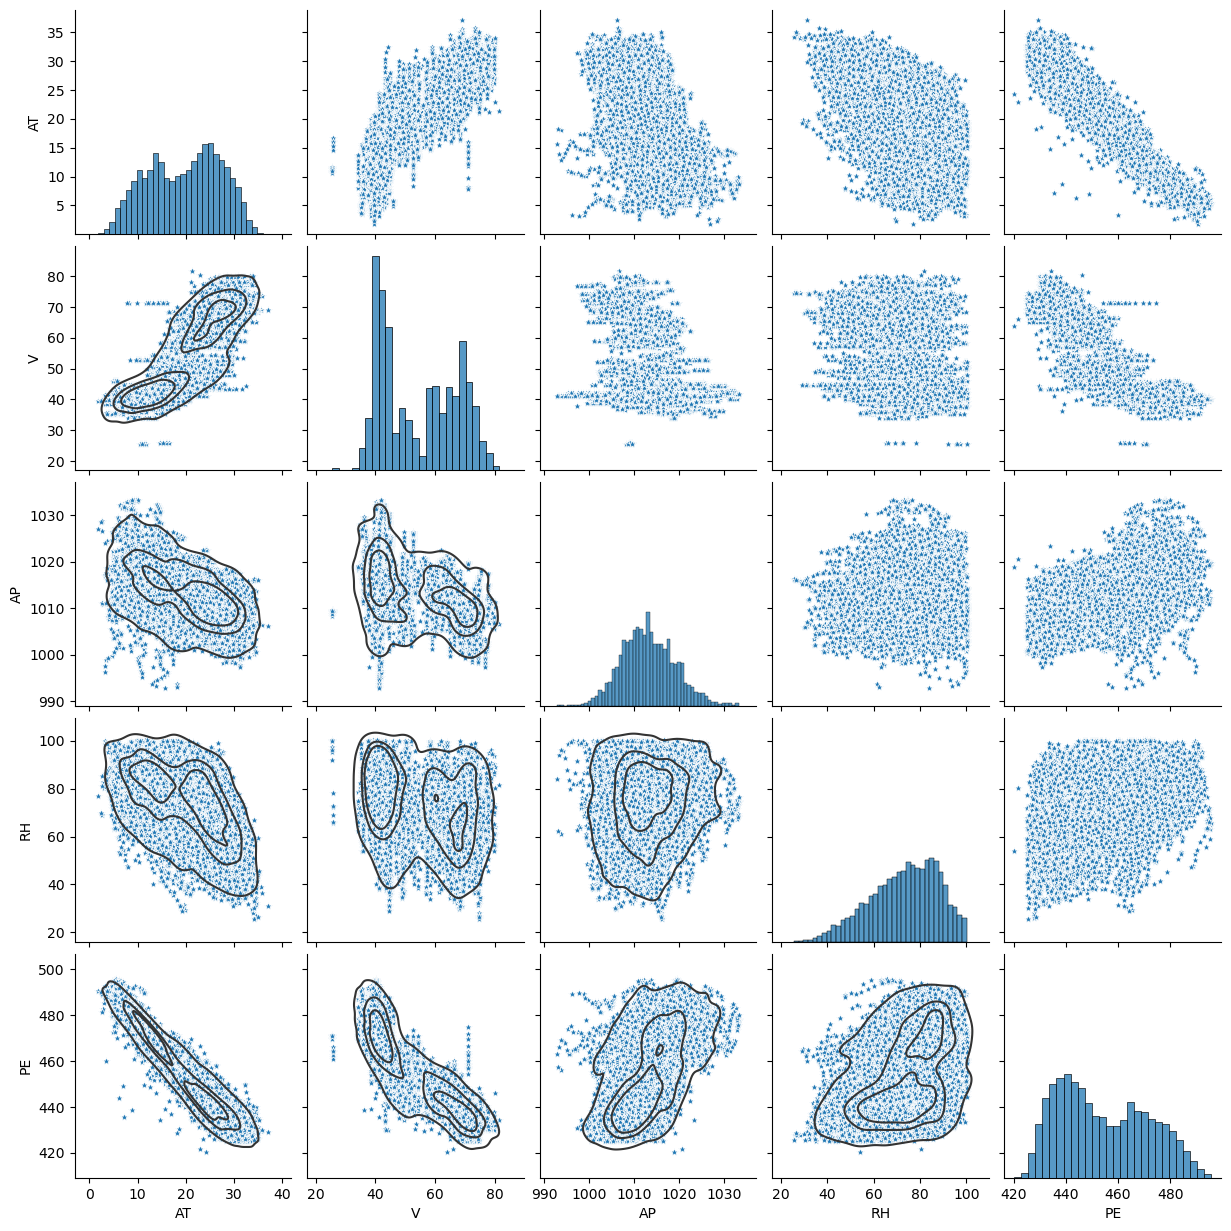

In [3]:
graph = sns.pairplot(df, dropna=True, plot_kws=dict(marker="*", linewidth=0.5))
graph.map_lower(sns.kdeplot, levels=4, color=".2")

#### 1. (b) iii. What are the mean, the median, range, first and third quartiles, and in-terquartile ranges of each of the variables in the dataset? Summarize themin a table.

In [4]:
df_describe = df.describe()
top = df_describe.loc['75%']
lower = df_describe.loc['25%']
df_describe.loc['iqr']  = top - lower
min = df_describe.loc['min']
max = df_describe.loc['max']
df_describe.loc['range']  = max - min
df_describe

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000
iqr,12.210000,24.800000,8.160000,21.502500,28.680000
range,35.300000,56.200000,40.410000,74.600000,75.500000


#### 1. (c) For each predictor, fit a simple linear regression model to predict the response.Describe your results. In which of the models is there a statistically significantassociation between the predictor and the response? Create some plots to backup your assertions. Are there any outliers that you would like to remove fromyour data for each of these regression tasks?

In [5]:
df_at = sm1.ols(formula = 'PE ~ AT ', data=df).fit()
print(df_at.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:32:55   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.0

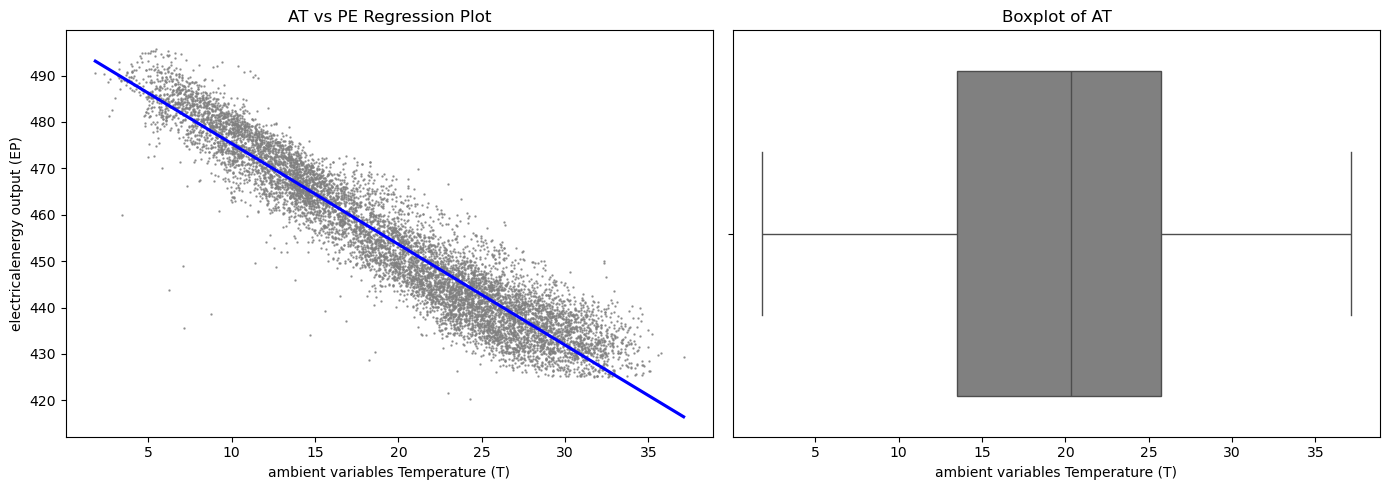

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, linestyle='none')

sns.regplot(
    x="AT", y="PE", data=df, color='b',
    line_kws={'label': "y={0:.2f}x+{1:.2f}".format(df_at.params.AT, df_at.params.Intercept)},
    scatter_kws={"color": "grey", "s": 0.5},
    ax=ax[0]).set(title='AT vs PE Regression Plot', xlabel='ambient variables Temperature (T)', ylabel='electricalenergy output (EP)')

sns.boxplot(x=df.AT, ax=ax[1], color='grey', flierprops=flierprops).set(title='Boxplot of AT', xlabel='ambient variables Temperature (T)')

plt.tight_layout()


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:32:55   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015      0.378   1370.218      0.0

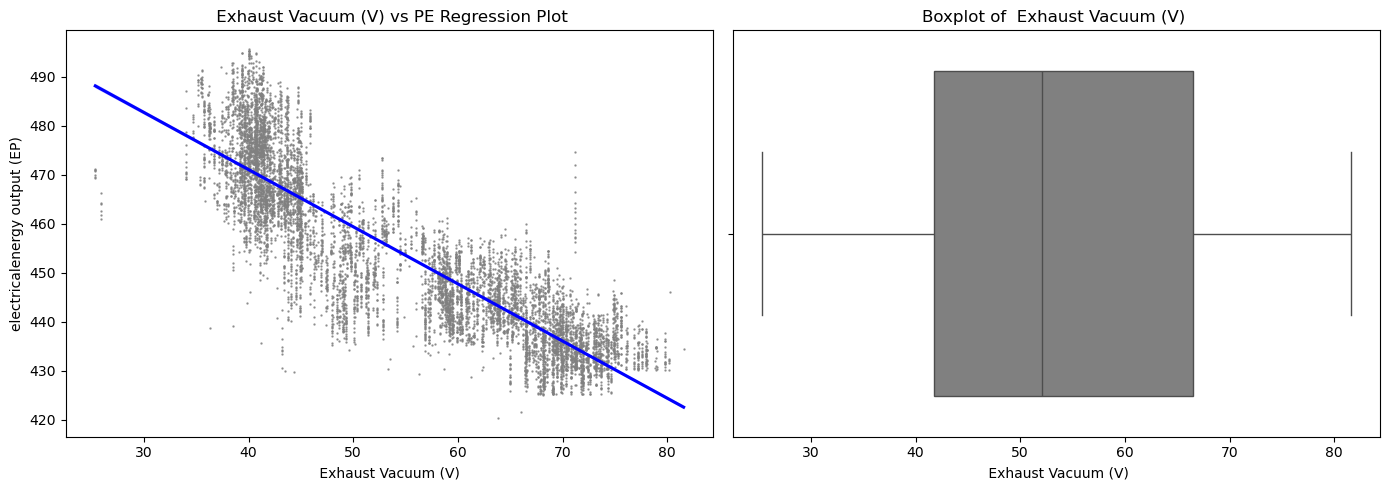

In [7]:
df_v = sm1.ols(formula = 'PE ~ V ', data=df).fit()
print(df_v.summary())
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, linestyle='none')

sns.regplot(
    x="V", y="PE", data=df, color='b',
    line_kws={'label': "y={0:.2f}x+{1:.2f}".format(df_v.params.V, df_v.params.Intercept)},
    scatter_kws={"color": "grey", "s": 0.5},
    ax=ax[0]).set(title=' Exhaust Vacuum (V) vs PE Regression Plot', xlabel=' Exhaust Vacuum (V) ', ylabel='electricalenergy output (EP)')

sns.boxplot(x=df.V, ax=ax[1], color='grey', flierprops=flierprops).set(title='Boxplot of  Exhaust Vacuum (V) ', xlabel=' Exhaust Vacuum (V)')

plt.tight_layout()

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:32:56   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.2610     25.459    -41.449      0.0

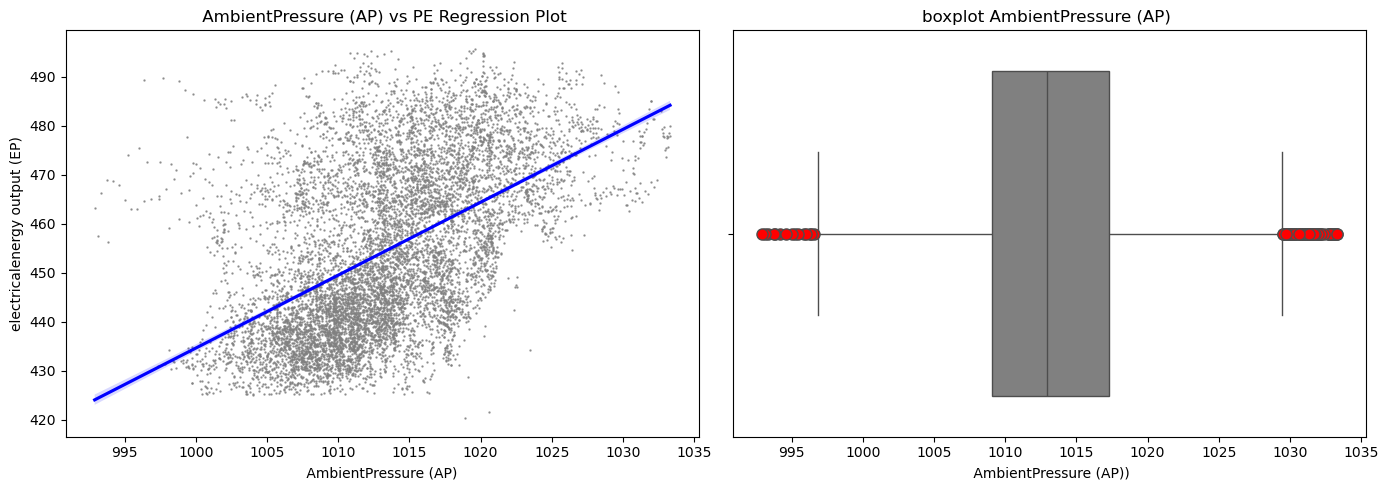

In [8]:
df_ap = sm1.ols(formula = 'PE ~ AP ', data=df).fit()
print(df_ap.summary())
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, linestyle='none')

sns.regplot(
    x="AP", y="PE", data=df, color='b',
    line_kws={'label': "y={0:.2f}x+{1:.2f}".format(df_ap.params.AP, df_ap.params.Intercept)},
    scatter_kws={"color": "grey", "s": 0.5},
    ax=ax[0]).set(title=' AmbientPressure (AP) vs PE Regression Plot', xlabel=' AmbientPressure (AP) ', ylabel='electricalenergy output (EP)')

sns.boxplot(x=df.AP, ax=ax[1], color='grey', flierprops=flierprops).set(title='boxplot AmbientPressure (AP) ', xlabel=' AmbientPressure (AP))')

plt.tight_layout()

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:32:56   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.9618      0.823    511.676      0.0

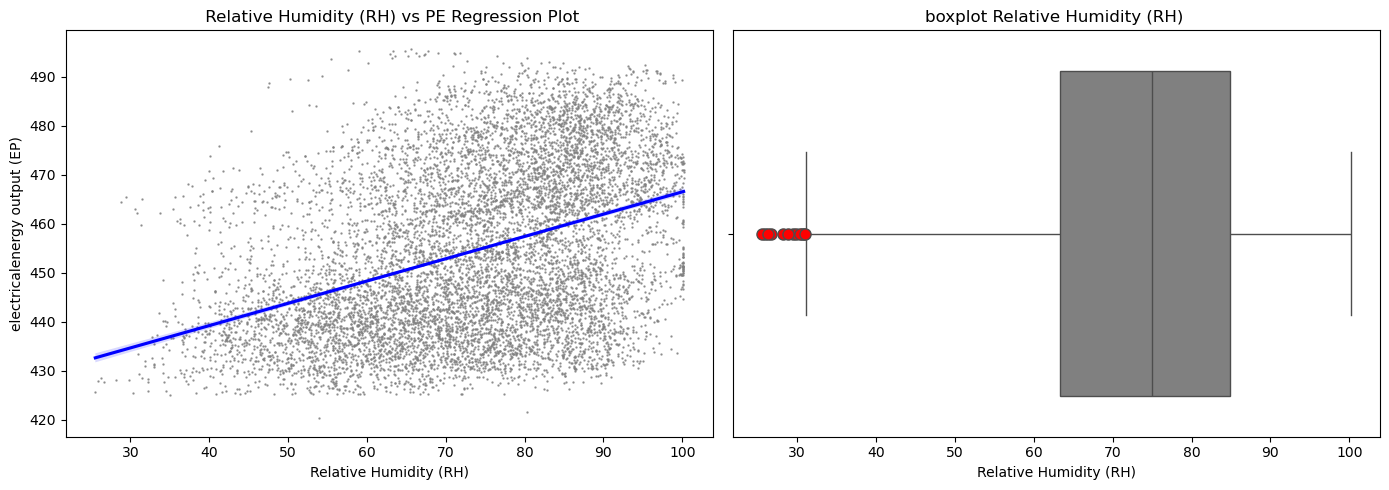

In [9]:
df_rh = sm1.ols(formula = 'PE ~ RH ', data=df).fit()
print(df_rh.summary())
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, linestyle='none')

sns.regplot(
    x="RH", y="PE", data=df, color='b',
    line_kws={'label': "y={0:.2f}x+{1:.2f}".format(df_rh.params.RH, df_rh.params.Intercept)},
    scatter_kws={"color": "grey", "s": 0.5},
    ax=ax[0]).set(title=' Relative Humidity (RH) vs PE Regression Plot', xlabel='Relative Humidity (RH)', ylabel='electricalenergy output (EP)')

sns.boxplot(x=df.RH, ax=ax[1], color='grey', flierprops=flierprops).set(title='boxplot Relative Humidity (RH) ', xlabel='Relative Humidity (RH)')

plt.tight_layout()

#### Conclusion 
- AT vs EP: p value: 0.00 coefficent: -2.1713, Based on above regression results, since p value is less than 0.05,the predictor is statistically significant. With negative relationship between predictor and response.  
- V vs EP: p value: 0.00 coefficent:  -1.1681, Based on above regression results, since p value is less than 0.05,the predictor is statistically significant. With negative relationship between predictor and response.  
- AP vs EP: p value: 0.00 coefficent:  1.4899, Based on above regression results, since p value is less than 0.05,the predictor is statistically significant. With positive relationship between predictor and response.  
- RH vs EP: p value: 0.00 coefficent: 0.4557. With positive relationship between predictor and response.  

#### 1. (d) Fit a multiple regression model to predict the response using all of the predictors.Describe your results. For which predictors can we reject the null hypothesis H0:βj= 0?

In [10]:
independent = df.iloc[:,:-1]
dependent =df.iloc[:,4:]
independent.head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [11]:
multi_result = sm.OLS(dependent,independent).fit()
print(multi_result.summary())

                                 OLS Regression Results                                
Dep. Variable:                     PE   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.939e+07
Date:                Fri, 27 Sep 2024   Prob (F-statistic):                        0.00
Time:                        22:32:57   Log-Likelihood:                         -29068.
No. Observations:                9568   AIC:                                  5.814e+04
Df Residuals:                    9564   BIC:                                  5.817e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Conclusion
- AT: p value: 0.00 coefficent: -1.6781,
- V: p value: 0.00 coefficent: -0.2726,
- AP: p value: 0.00 coefficent: 0.5028,
- RH: p value: 0.00 coefficent: -0.0999.
- Based on above multivarie regression results, since all p values is less than 0.05,the predictor is statistically significant. Thus, we can reject null hypothesis of H0:βj= 0. 

#### 1. (e) How do your results from 1c compare to your results from 1d? Create a plotdisplaying the univariate regression coefficients from 1c on the x-axis, and themultiple regression coefficients from 1d on the y-axis. That is, each predictor isdisplayed as a single point in the plot. Its coefficient in a simple linear regressionmodel is shown on the x-axis, and its coefficient estimate in the multiple linearregression model is shown on the y-axis.

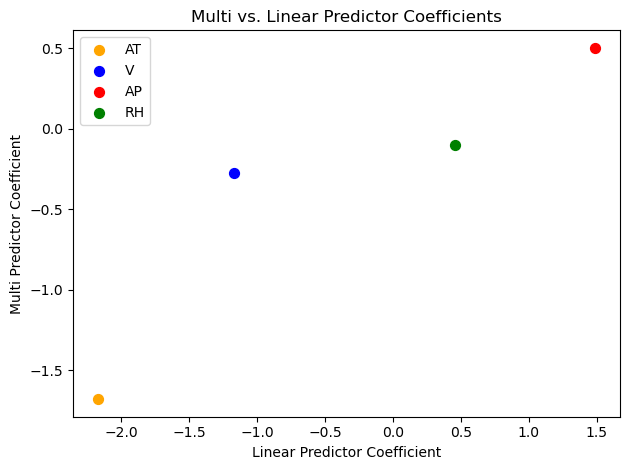

In [12]:
ax = plt.axes()
plt.scatter(df_at.params.AT, multi_result.params.AT, s=50, color='orange', label='AT')
plt.scatter(df_v.params.V, multi_result.params.V, s=50, color='blue', label='V')
plt.scatter(df_ap.params.AP, multi_result.params.AP, s=50, color='red', label='AP')
plt.scatter(df_rh.params.RH, multi_result.params.RH, s=50, color='green', label='RH')
ax.set(title='Multi vs. Linear Predictor Coefficients', 
       xlabel='Linear Predictor Coefficient', 
       ylabel='Multi Predictor Coefficient')
ax.legend()
plt.tight_layout()
plt.show()

### 1. (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X , fit a model of the form 2

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:32:57   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0747      0.009      8.415      0.0

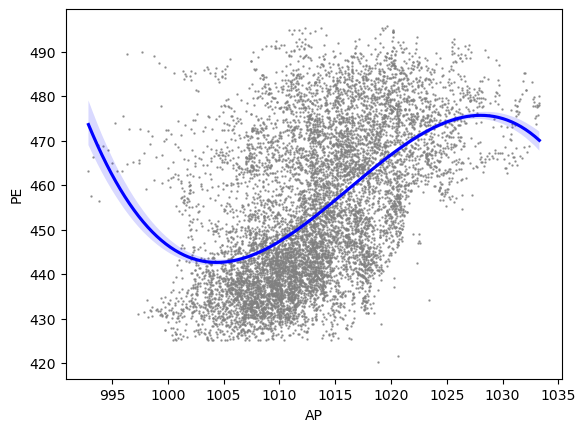

In [13]:
df_pol_ap = sm1.ols(formula = 'PE ~ AP + I(AP**2) + I(AP**3)', data=df).fit()
print(df_pol_ap.summary())
ax = sns.regplot(x="AP", y="PE", data=df, color='b',scatter_kws={"color": "grey", "s": 0.5} ,order=3)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:32:58   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    554.1468      9.151     60.557      0.0

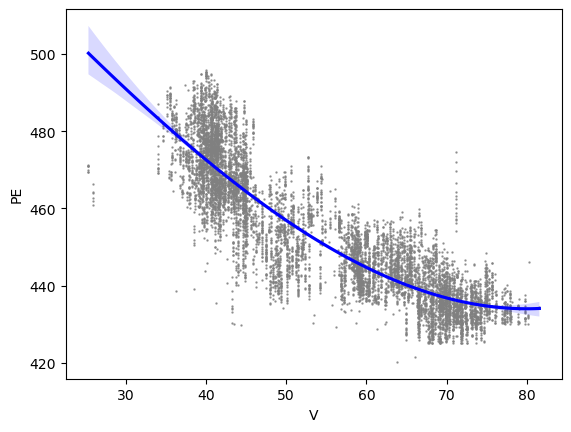

In [14]:
df_pol_v = sm1.ols(formula = 'PE ~ V + I(V**2) + I(V**3)', data=df).fit()
print(df_pol_v.summary())
ax = sns.regplot(x="V", y="PE", data=df, color='b',scatter_kws={"color": "grey", "s": 0.5} ,order=3)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:32:59   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    492.7281      0.673    732.248      0.0

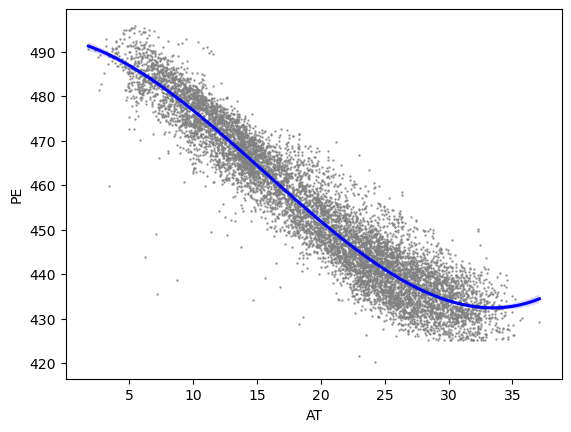

In [15]:
df_pol_at = sm1.ols(formula = 'PE ~ AT + I(AT**2) + I(AT**3)', data=df).fit()
print(df_pol_at.summary())
ax = sns.regplot(x="AT", y="PE", data=df, color='b',scatter_kws={"color": "grey", "s": 0.5} ,order=3)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:32:59   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    468.4135     10.545     44.422      0.0

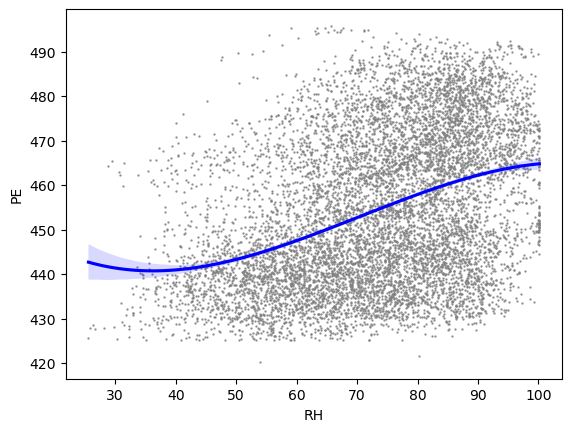

In [16]:
df_pol_rh = sm1.ols(formula = 'PE ~ RH + I(RH**2) + I(RH**3)', data=df).fit()
print(df_pol_rh.summary())
ax = sns.regplot(x="RH", y="PE", data=df, color='b',scatter_kws={"color": "grey", "s": 0.5} ,order=3)

#### Conclusion: 
- From above regression results, we see that AT, V, AP, RH cofficients' p value are below 0.05 except one from PE's quadratic term. This indicates all realtionships aren't strictly linear and in addition the p value from PE's quadratic term sugguests that the relationship between V and PE is not quadratic relationship but we can describe it as cubic relationship. 

#### 1. (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant

In [17]:
df_all_pol = sm1.ols(formula = 'PE ~ AT+V+AP+RH+I(AT*V)+I(AT*AP)+I(AT*RH)+I(V*AP)+I(V*RH)+I(AP*RH)', data=df).fit()

print(df_all_pol.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:33:00   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

#### Conclusion 
- After running full linear regression with pairwise interaction, we see that except I(AT * AP)andI(V * RH), all other pair's p values are below 0.05. This indicates that all those pairs have interaction between each other and not fully independent. 

#### 1. (h) Can you improve your model using possible interaction terms or nonlinear asso- ciations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regres- sion model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [18]:
independent = df.iloc[:,:-1]
dependent =df.iloc[:,4:]
independent.head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [19]:
x_train, x_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.30, random_state=1)

base_model = sm.OLS(y_train, x_train).fit()
print(base_model.summary())

base_y_train_pred = base_model.predict(x_train)

base_y_test_pred = base_model.predict(x_test)

train_mse_base = mean_squared_error(y_train, base_y_train_pred)
test_mse_base = mean_squared_error(y_test, base_y_test_pred)

print(f"Base Model Train MSE: {train_mse_base:.4f}")
print(f"Base Model Test MSE: {test_mse_base:.4f}")

                                 OLS Regression Results                                
Dep. Variable:                     PE   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.349e+07
Date:                Fri, 27 Sep 2024   Prob (F-statistic):                        0.00
Time:                        22:33:00   Log-Likelihood:                         -20366.
No. Observations:                6697   AIC:                                  4.074e+04
Df Residuals:                    6693   BIC:                                  4.077e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [20]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(independent, dependent, test_size=0.30, random_state=1)
model1 = sm1.ols(formula = 'PE ~ AT +V + AP + RH + +I(AT*RH)+I(AT*V)+I(AT*AP)+I(V*AP)+I(V*RH)+I(RH*AP)+I(AT**2)+I(AP**2)+I(RH**2)+I(V**2)', data=df).fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.030e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:33:00   Log-Likelihood:                -27431.
No. Observations:                9568   AIC:                         5.489e+04
Df Residuals:                    9553   BIC:                         5.500e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7503.7323   1207.276     -6.215      0.0

In [21]:
# base on above we remove I(V * RH)     
x_train1, x_test1, y_train1, y_test1 = train_test_split(independent, dependent, test_size=0.30, random_state=1)
model2 = sm1.ols(formula = 'PE ~ AT +V + AP + RH + +I(AT*RH)+I(AT*V)+I(AT*AP)+I(V*AP)+I(RH*AP)+I(AT**2)+I(AP**2)+I(RH**2)+I(V**2)', data=df).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.109e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:33:00   Log-Likelihood:                -27432.
No. Observations:                9568   AIC:                         5.489e+04
Df Residuals:                    9554   BIC:                         5.499e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7444.2915   1204.749     -6.179      0.0

In [22]:
# remove I(AT * AP)     
x_train1, x_test1, y_train1, y_test1 = train_test_split(independent, dependent, test_size=0.30, random_state=1)
model3 = sm1.ols(formula = 'PE ~ AT +V + AP + RH + +I(AT*RH)+I(AT*V)+I(V*AP)+I(RH*AP)+I(AT**2)+I(AP**2)+I(RH**2)+I(V**2)', data=df).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.201e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:33:00   Log-Likelihood:                -27432.
No. Observations:                9568   AIC:                         5.489e+04
Df Residuals:                    9555   BIC:                         5.498e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8180.2601   1051.557     -7.779      0.0

In [23]:
# remove I(V ** 2) 
x_train1, x_test1, y_train1, y_test1 = train_test_split(independent, dependent, test_size=0.30, random_state=1)
model4 = sm1.ols(formula = 'PE ~ AT +V + AP + RH + +I(AT*RH)+I(AT*V)+I(V*AP)+I(RH*AP)+I(AT**2)+I(AP**2)+I(RH**2)', data=df).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.310e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:33:00   Log-Likelihood:                -27433.
No. Observations:                9568   AIC:                         5.489e+04
Df Residuals:                    9556   BIC:                         5.498e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8287.2433   1049.226     -7.898      0.0

In [24]:
after_y_train_pred = model3.predict(x_train1)

after_y_test_pred = model3.predict(x_test1)

train_mse = mean_squared_error(y_train1, after_y_train_pred)
test_mse = mean_squared_error(y_test1, after_y_test_pred)

print(f"After tunned Model Train MSE: {train_mse:.4f}")
print(f"After tunned Model Test MSE: {test_mse:.4f}")

After tunned Model Train MSE: 18.0648
After tunned Model Test MSE: 18.2062


#### Conclusion: 
- From above tunning, after we removed insignificant/interaction predictors, bosth train/test mse reduced. 

#### 1. (h) Performk -nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ { 1, 2 , . .., 100} that gives you the best fit. Plot the train and test errors in terms of 1 /k
- i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k∈ {1,2, . . . ,100} that gives you the best fit. Plot the train and test errors in terms of 1/k

In [25]:
x_train, x_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.30, random_state=1)

# normalize
scaler = StandardScaler()
x_train_normal = scaler.fit_transform(x_train)
x_test_normal = scaler.transform(x_test)

# before loop 
k_values = range(1, 101)
train_errors_raw = []
test_errors_raw = []
train_errors_normal = []
test_errors_normal = []

for k in k_values:
    # knn_raw
    knn_raw = KNeighborsRegressor(n_neighbors=k)
    knn_raw.fit(x_train, y_train)
    train_pred_raw = knn_raw.predict(x_train)
    test_pred_raw = knn_raw.predict(x_test)
    train_errors_raw.append(mean_squared_error(y_train, train_pred_raw))
    test_errors_raw.append(mean_squared_error(y_test, test_pred_raw))

    # knn with normal 
    knn_normal = KNeighborsRegressor(n_neighbors=k)
    knn_normal.fit(x_train_normal, y_train)
    train_pred_normal = knn_normal.predict(x_train_normal)
    test_pred_normal = knn_normal.predict(x_test_normal)
    train_errors_normal.append(mean_squared_error(y_train, train_pred_normal))
    test_errors_normal.append(mean_squared_error(y_test, test_pred_normal))


# find best k for raw and normal 
best_k_raw = k_values[pd.Series(test_errors_raw).idxmin()]  
best_k_normal = k_values[pd.Series(test_errors_normal).idxmin()]

print(f"Best k for raw features: {best_k_raw},  Test MSE: {pd.Series(test_errors_raw).min():.4f}")
print(f"Best k for normalized features: {best_k_normal}, Test MSE: {pd.Series(test_errors_normal).min():.4f}")

Best k for raw features: 5,  Test MSE: 15.7048
Best k for normalized features: 4, Test MSE: 14.0706


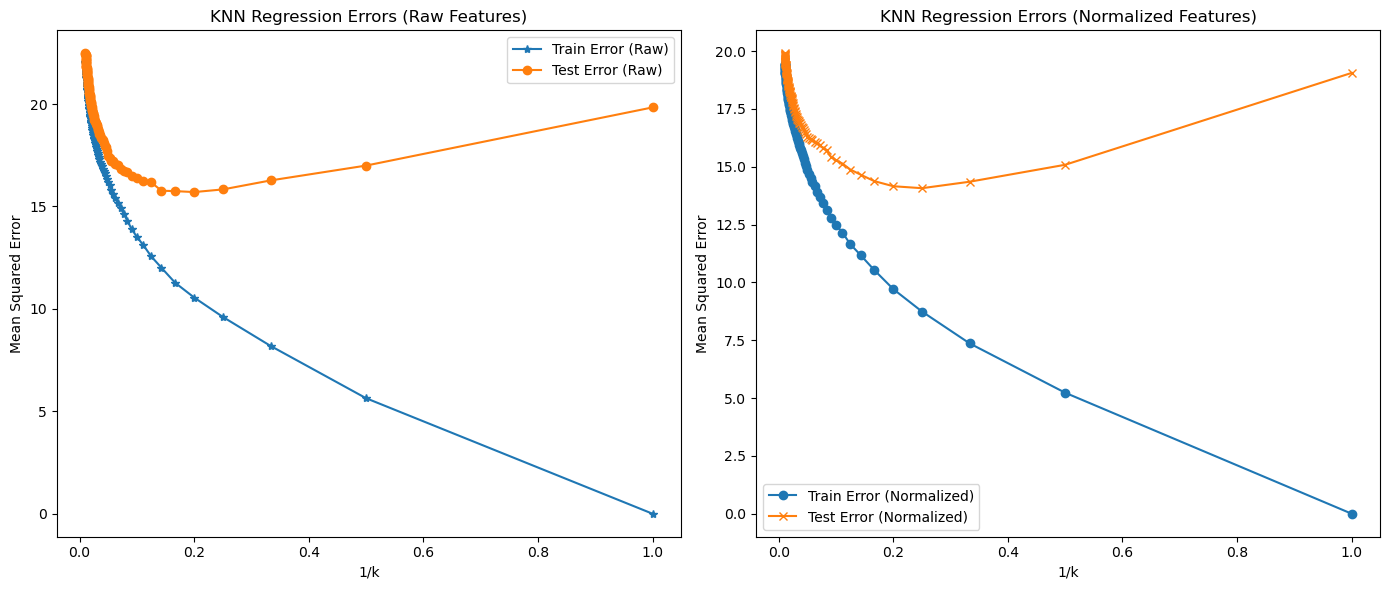

In [26]:
plt.figure(figsize=(14, 6))

# knn raw
plt.subplot(1, 2, 1)
plt.plot([1/k for k in k_values], train_errors_raw, label='Train Error (Raw)', marker='*')
plt.plot([1/k for k in k_values], test_errors_raw, label='Test Error (Raw)', marker='o')
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error')
plt.title('KNN Regression Errors (Raw Features)')
plt.legend()

# knn normal
plt.subplot(1, 2, 2)
plt.plot([1/k for k in k_values], train_errors_normal, label='Train Error (Normalized)', marker='o')
plt.plot([1/k for k in k_values], test_errors_normal, label='Test Error (Normalized)', marker='x')
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error')
plt.title('KNN Regression Errors (Normalized Features)')
plt.legend()

plt.tight_layout()
plt.show()

#### 1. (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysi

- The lowest mse result we get from linear regression is after tunned Model with Train MSE: 18.0648
and Test MSE: 18.2062. As from above knn regression, we see that lowest Test MSE for raw data is 15.7048
Best Test MSE for normalized data is 14.0706.
- Few reasons why knn performs better than regression predictions. First although we include interactions and qudratic terms in our best regression model, it can still underfit. On the other hand, knn is more flexible that captures more decision boundaries than linear regression. Second, having data normalized when using KNN is very important as it can provides a huge benfit in performence. Third, linear regression may perform better when sample size is small, but considering we have over 9000 records, the KNN with normalization clearly would have better performence. Last, KNN is less sensitive to outliers. In above regression, although we remove many insignificant predictors, we didn't consider clean the outliers. In all, by above analysis, the knn model would perform better.   

#### 2. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.
- (a) The sample size n is extremely large, and the number of predictors p is small.
Since sample size is large and with small number of predictors, an flexible model would
outperform the flexible model. A flexible model tends to perform better when there are more
sample data. Since n is large with few predictors, we expect a flexible model would perform
better on this case.
- (b) The number of predictors p is extremely large, and the number of observations n is
small.
In contrast to above case, a flexible model would perform worse than inflexible model as it tends
to overfit. In the case of smaller sample size, flexible can have high variance and does not
capture the true predicted value.
- (c) The relationship between the predictors and response is highly non-linear.
Flexible model will perform better. Under high degree of freedom, flexible model performs
better.
- (d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.
When variance of the error is high, the flexible model would perform worse. As flexible
model tends to overfit, high variance of the error will affect the prediction. Thus make it
worse than inflexible model.

#### 3. The table below provides a training data set containing six observa- tions, three predictors, and one qualitative response variable.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### (a) Compute the Euclidean distance between each observation and thetestpoint,X1 =X2 =X3 =0.

In [28]:
df = pd.DataFrame({
    'observation': [1, 2, 3, 4, 5, 6],
    'X1': [0, 2, 0, 0, 1, 1],
    'X2': [3, 0, 1, 1, 0, 1],
    'X3': [0, 0, 3, 2, 1, 1],
    'Y': ['Red', 'Red', 'Red', 'Green', 'Green', 'Red'],
    'Euclidean_distance': [(np.sqrt(3*3)), np.sqrt(2*2), np.sqrt(1*1+3*3), np.sqrt(1*1+2*2), np.sqrt(1*1+1*1), np.sqrt(1*1+1*1+1*1)]
})
df['Euclidean_distance'] = df['Euclidean_distance'].round(3)

print(df)

   observation  X1  X2  X3      Y  Euclidean_distance
0            1   0   3   0    Red               3.000
1            2   2   0   0    Red               2.000
2            3   0   1   3    Red               3.162
3            4   0   1   2  Green               2.236
4            5   1   0   1  Green               1.414
5            6   1   1   1    Red               1.732


(b) What is our prediction with K = 1? Why? (c) What is our prediction with K = 3? Why?

In [29]:
from sklearn.neighbors import KNeighborsClassifier
#set x and y 
X = df[['X1', 'X2', 'X3']]
Y = df['Y']

#create KNN model with K=1 and K=3 
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_3 = KNeighborsClassifier(n_neighbors=3)

#fit the model
knn_1.fit(X, Y)
knn_3.fit(X, Y)

#prediction
data = [[0, 0, 0]] 
prediction_1 = knn_1.predict(data)
prediction_3 = knn_3.predict(data)

print(f"Prediction for k=1 is {prediction_1}, for k= 3 is {prediction_3}")

Prediction for k=1 is ['Green'], for k= 3 is ['Red']


/Users/main/anaconda3/envs/autogluon/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/main/anaconda3/envs/autogluon/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(d) If the Bayes decision boundary in this problem is highly non- linear, then would we expect the best value for K to be large or small? Why?

- the best choice for the value of k is 1 or smaller value if boundary in this problem is highly nonlinear. Because it examines neihbor data points closely.